In [3]:
import pandas as pd
import json

file_path = '/Users/skim/VSCode/DIS Copenhagen/Computational Analysis of Big Data/Final Project/signalmedia-1m.jsonl'

left_sources = {"cnn", "the new york times", "vox.com", "msnbc", "buzzfeed", "the new yorker: news"}
right_sources = {"fox news", "breitbart.com", "theblaze.com - stories", "cbn.com - cbn news", "daily caller", "daily mail", "newsmax.com", "new york post", "the american conservative \u00bb daniel larison", "infowars", "redstate", "national review"}

left_rows = []
right_rows = []

with open(file_path, 'r') as file:
    for line in file:
        entry = json.loads(line)
        if entry.get('source', '').lower().strip() in left_sources:
            left_rows.append(entry)
        if entry.get('source', '').lower().strip() in right_sources:
            right_rows.append(entry)
        if len(left_rows) + len(right_rows) >= 3000:
            break

left_data = pd.DataFrame(left_rows)
left_data["label"] = 0 # 0 for left

right_data = pd.DataFrame(right_rows)
right_data["label"] = 1 # 1 for right

combined_data = pd.concat([left_data, right_data], ignore_index=True)

In [4]:
##print(combined_data[['content', 'source']].head())
combined_data.head()

,id,content,title,media-type,source,published,label
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0


In [5]:
## Preprocessing time:
import nltk
## STEP 1 TOKENIZE ##
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('punkt_tab')
# tokenization into sentences

test_text = combined_data.iloc[0]['content']
test_tokenized = word_tokenize(test_text)

print(test_tokenized)


['Georgia', 'is', 'set', 'to', 'execute', 'its', 'only', 'woman', 'on', 'death', 'row', 'Tuesday', 'evening', '.', 'If', 'all', 'goes', 'according', 'to', 'the', 'state', '’', 's', 'plan', ',', 'Kelly', 'Gissendaner', 'will', 'be', 'the', 'first', 'woman', 'the', 'state', 'has', 'executed', 'in', '70', 'years', '.', 'She', 'was', 'sentenced', 'to', 'death', 'in', '1998', 'for', 'plotting', 'the', 'death', 'of', 'her', 'husband', ',', 'Douglas', 'Gissendaner', ',', 'with', 'her', 'boyfriend', '.', 'Gissendaner', 'drove', 'her', 'boyfriend', ',', 'Gregory', 'Owen', ',', 'to', 'her', 'house', ',', 'gave', 'him', 'the', 'murder', 'weapons', '—', 'a', 'nightstick', 'and', 'a', 'hunting', 'knife', '—', 'and', 'then', 'went', 'to', 'a', 'nightclub', 'with', 'friends', ',', 'according', 'to', 'court', 'documents', '.', 'Owen', 'ambushed', 'Douglas', 'and', 'forced', 'him', 'to', 'drive', 'his', 'car', 'to', 'a', 'remote', 'location', 'that', 'Gissendaner', 'chose', 'beforehand', '.', 'Once', '

In [6]:
combined_data['text_tokenized'] = combined_data['content'].apply(word_tokenize)
combined_data.head()

,id,content,title,media-type,source,published,label,text_tokenized
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0,"[Georgia, is, set, to, execute, its, only, wom..."
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0,"[Story, highlights, Family, posts, ,, ``, We, ..."
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0,"[Obama, dropped, in, on, ``, The, Late, Show, ..."
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0,"[Story, highlights, Estonia, ,, a, neighbor, o..."
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0,"[Story, highlights, Swiss, prosecutors, open, ..."


In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def filter_tokens(tokens):
    return [word for word in tokens if word.casefold() not in stop_words and word.isalpha()]

combined_data['text_tokenized_filtered'] = combined_data['text_tokenized'].apply(filter_tokens)

combined_data.head()

,id,content,title,media-type,source,published,label,text_tokenized,text_tokenized_filtered
0,693ae030-4239-4291-b248-dbf7c1696ff2,Georgia is set to execute its only woman on de...,Georgia Plans To Execute Its Only Woman On Dea...,News,BuzzFeed,2015-09-28T22:24:29Z,0,"[Georgia, is, set, to, execute, its, only, wom...","[Georgia, set, execute, woman, death, row, Tue..."
1,e7157bbf-6ad4-477d-a4e4-14a0bb9ad9f5,"Story highlights Family posts, ""We are devasta...",'Senseless loss of a beautiful life',News,CNN,2015-09-07T19:48:15Z,0,"[Story, highlights, Family, posts, ,, ``, We, ...","[Story, highlights, Family, posts, devastated,..."
2,0ef6b514-620d-4e8a-9405-e390e16c6cd7,"Obama dropped in on ""The Late Show with Stephe...",Michelle Obama gives Stephen Colbert advice fo...,News,CNN,2015-09-29T10:33:00Z,0,"[Obama, dropped, in, on, ``, The, Late, Show, ...","[Obama, dropped, Late, Show, Stephen, Colbert,..."
3,96b993b2-320f-457a-bab2-6bc214c05013,"Story highlights Estonia, a neighbor of Russia...",U.S. stealth fighters visit Estonia,News,CNN,2015-09-07T18:09:09Z,0,"[Story, highlights, Estonia, ,, a, neighbor, o...","[Story, highlights, Estonia, neighbor, Russia,..."
4,c3a3224d-bae5-40e3-80f6-0ca74083beaf,Story highlights Swiss prosecutors open crimin...,FIFA boss Blatter facing criminal proceedings,News,CNN,2015-09-25T16:38:47Z,0,"[Story, highlights, Swiss, prosecutors, open, ...","[Story, highlights, Swiss, prosecutors, open, ..."


In [8]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2173 entries, 0 to 2172
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       2173 non-null   object
 1   content                  2173 non-null   object
 2   title                    2173 non-null   object
 3   media-type               2173 non-null   object
 4   source                   2173 non-null   object
 5   published                2173 non-null   object
 6   label                    2173 non-null   int64 
 7   text_tokenized           2173 non-null   object
 8   text_tokenized_filtered  2173 non-null   object
dtypes: int64(1), object(8)
memory usage: 152.9+ KB


In [9]:
import random

# Find how many right-leaning articles there are
num_right = combined_data[combined_data['label'] == 0].shape[0]
print(f"Number of left-leaning articles: {num_right}")

# Randomly select the same number of right-leaning articles
left_data_subset = combined_data[combined_data['label'] == 1].sample(n=num_right, random_state=42)

# Combine the selected right-leaning data with the left-leaning data
combined_data = pd.concat([combined_data[combined_data['label'] == 0], left_data_subset], ignore_index=True)

# Display the distribution of the new balanced dataset
print(combined_data['label'].value_counts())

Number of left-leaning articles: 1075
label
0    1075
1    1075
Name: count, dtype: int64


In [10]:
# Add a preprocessing step to convert all tokenized filtered words to lowercase
combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
    lambda x: [word.lower() for word in x]
)

# Manually specify a set of stopwords that start with 'reuters'
manual_stopwords = ['reuters', 'reuters.com', 'reutersnews', 'reutersnews.com']

# Preprocessing step: Convert all tokenized filtered words to lowercase and remove stopwords
combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
    lambda x: [word.lower() for word in x if not any(word.startswith(stopword) for stopword in manual_stopwords)]
)

Most common words and their frequencies:
said: 5697
one: 2388
hide: 2356
people: 2338
caption: 2327
would: 2319
new: 2006
also: 1814
trump: 1722
like: 1694
first: 1443
clinton: 1368
time: 1348
two: 1228
president: 1212
could: 1204
told: 1173
get: 1103
last: 1098
many: 1089
years: 1087
state: 1085
even: 1083
year: 1076
view: 1055
world: 1044
obama: 1034
pope: 1004
image: 984
says: 977
states: 967
united: 948
back: 934
police: 928
make: 914
news: 905
think: 903
day: 886
government: 885
way: 871
know: 861
francis: 854
us: 850
going: 846
say: 828
percent: 818
house: 802
according: 798
may: 797
cnn: 797
life: 791
take: 779
see: 779
republican: 777
refugees: 769
made: 767
since: 757
want: 752
right: 750
country: 745
show: 742
isis: 738
week: 729
much: 723
still: 714
story: 711
women: 709
syria: 699
next: 687
work: 686
best: 679
go: 671
september: 668
need: 654
city: 652
another: 647
bush: 644
well: 642
good: 642
campaign: 634
family: 633
three: 630
former: 617
presidential: 613
national: 601

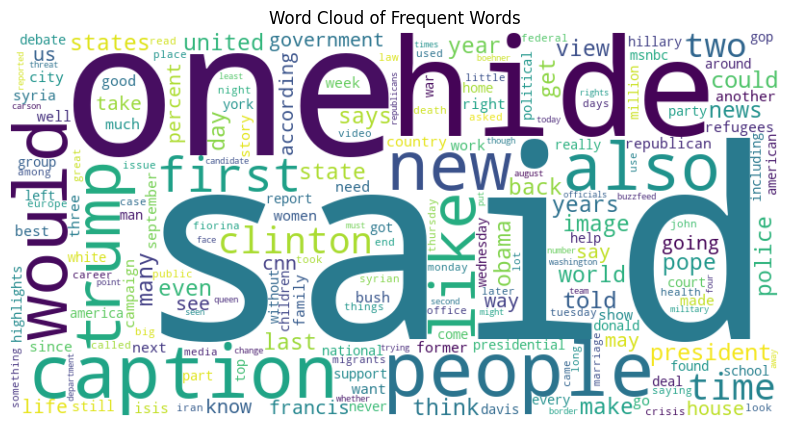

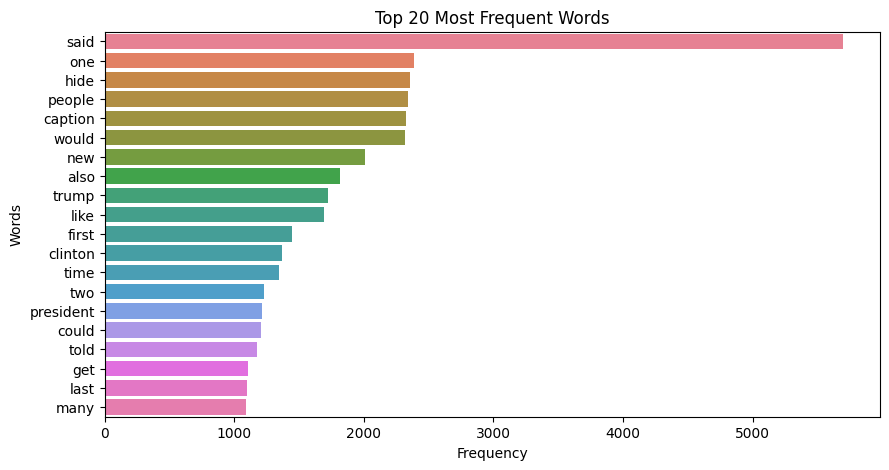

Average number of words per entry: 267.43


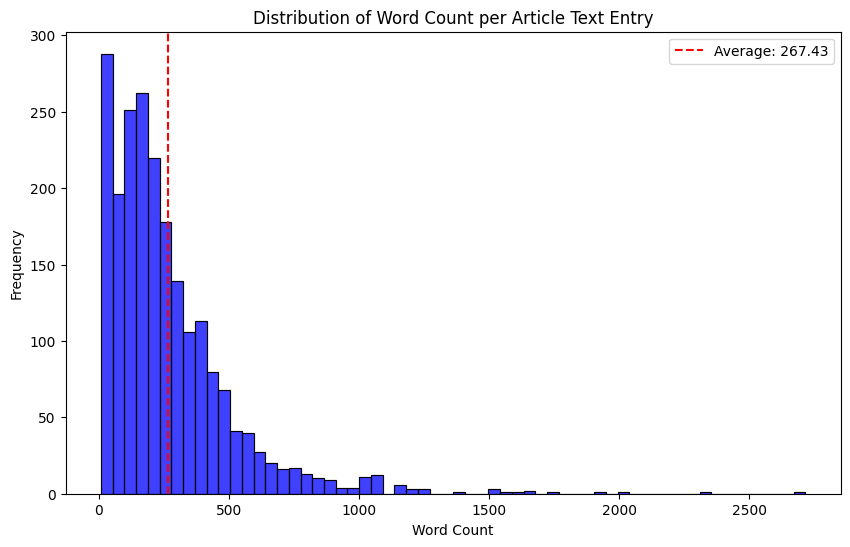

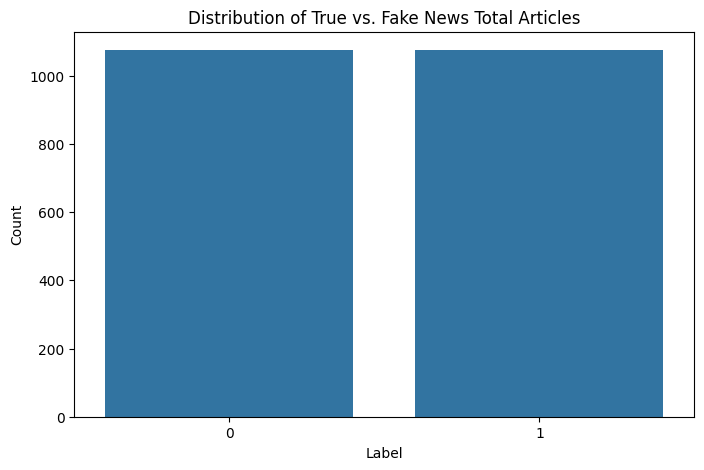

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Assuming combined_data contains 'text_tokenized_filtered' and 'label'

# 1. Word Frequency Analysis
# Flatten the list of tokenized words and count the occurrences of each word
all_words = [word for tokens in combined_data['text_tokenized_filtered'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(100)
print("Most common words and their frequencies:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# 2. Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

# 3. Frequency Distribution of Words
# Plot the top 20 most frequent words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), hue=list(words), legend=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# 4. Average Number of Words per Text Entry
word_counts_per_entry = combined_data['text_tokenized_filtered'].apply(len)
avg_words_per_entry = word_counts_per_entry.mean()
print(f"Average number of words per entry: {avg_words_per_entry:.2f}")

# 5. Text Length Distribution (Word Count)
plt.figure(figsize=(10, 6))
sns.histplot(word_counts_per_entry, bins=60, color='blue')
plt.title('Distribution of Word Count per Article Text Entry')
plt.axvline(avg_words_per_entry, color='red', linestyle='--', label=f'Average: {avg_words_per_entry:.2f}')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 8. Sentiment Distribution (if label represents sentiment)
# If labels are binary (0 and 1), you can plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_data)
plt.title('Distribution of True vs. Fake News Total Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Separate the data into true (label=1) and fake (label=0) articles
left_articles = combined_data[combined_data['label'] == 1]
right_articles = combined_data[combined_data['label'] == 0]

# Flatten the tokenized words for true articles and fake articles
left_biased_words = [word for tokens in left_articles['text_tokenized_filtered'] for word in tokens]
right_biased_words = [word for tokens in right_articles['text_tokenized_filtered'] for word in tokens]

# Count word frequencies for both true and fake articles
left_biased_word_counts = Counter(left_biased_words)
right_biased_word_counts = Counter(right_biased_words)

# Get the most common words for true and fake articles (top 250)
most_common_left_words = left_biased_word_counts.most_common(250)
most_common_right_words = right_biased_word_counts.most_common(250)

# Print the most common words for true articles
print("Most common words in left-leaning articles:")
for word, count in most_common_true_words:
    print(f"{word}: {count}")

# Print the most common words for fake articles
print("\nMost common words in right-leaning articles:")
for word, count in most_common_fake_words:
    print(f"{word}: {count}")

Most common words in left-leaning articles:


NameError: name 'most_common_true_words' is not defined

In [ ]:
# Convert the most common words into sets for easy comparison
left_biased_words_set = set([word for word, _ in most_common_left_words])
right_biased_words_set = set([word for word, _ in most_common_right_words])

# Find words that appear in true articles but not in fake articles
unique_left_words = left_biased_words_set - right_biased_words_set

# Find words that appear in fake articles but not in true articles
unique_right_words = right_biased_words_set - left_biased_words_set

# Print the unique words that could lean towards being true or fake
print("Words that may lean towards an article being LEFT-LEANING:")
for word in unique_left_words:
    print(word)

print("\nWords that may lean towards an article being RIGHT-LEANING:")
for word in unique_right_words:
    print(word)

Words that may lean towards an article being LEFT-LEANING:
keep
become
rubio
immigration
policy
reported
however
job
less
fact
question
already
win
times
vote
service
believe
poll
voters
gay
daily
business
percent
democrats
thing
congress
past
bill
black
meeting
post
candidate
parenthood
federal
texas
went
several
program
muslim
month
give
plan
months
online
company
earlier
republicans
follow
tax
planned
department
better
content
democratic
twitter
game
conservative
free
yet
money
share
email
season
run
rights
general
market
americans
real
problem
ago
must
economic
important
stories
current
large

Words that may lean towards an article being RIGHT-LEANING:
border
ii
across
russia
face
europe
october
check
south
five
young
food
isis
saturday
countries
photo
find
migrants
center
threat
rover
always
august
love
spotlight
kim
fashion
career
syrian
death
hungary
iraq
set
wrote
nations
water
caption
highlights
articles
seen
different
crisis
taken
buzzfeed
taking
civil
war
international
histo

In [13]:
combined_data.iloc[0]['text_tokenized_filtered']

['georgia',
 'set',
 'execute',
 'woman',
 'death',
 'row',
 'tuesday',
 'evening',
 'goes',
 'according',
 'state',
 'plan',
 'kelly',
 'gissendaner',
 'first',
 'woman',
 'state',
 'executed',
 'years',
 'sentenced',
 'death',
 'plotting',
 'death',
 'husband',
 'douglas',
 'gissendaner',
 'boyfriend',
 'gissendaner',
 'drove',
 'boyfriend',
 'gregory',
 'owen',
 'house',
 'gave',
 'murder',
 'weapons',
 'nightstick',
 'hunting',
 'knife',
 'went',
 'nightclub',
 'friends',
 'according',
 'court',
 'documents',
 'owen',
 'ambushed',
 'douglas',
 'forced',
 'drive',
 'car',
 'remote',
 'location',
 'gissendaner',
 'chose',
 'beforehand',
 'arrived',
 'owen',
 'beat',
 'douglas',
 'stabbed',
 'owen',
 'took',
 'douglas',
 'wedding',
 'ring',
 'watch',
 'make',
 'look',
 'like',
 'robbery',
 'gissendaner',
 'later',
 'arrived',
 'scene',
 'helped',
 'boyfriend',
 'burn',
 'husband',
 'body',
 'car',
 'law',
 'enforcement',
 'unable',
 'find',
 'douglas',
 'body',
 'weeks',
 'owen',
 'ac

In [14]:
combined_data['text_tokenized_filtered']

0       [georgia, set, execute, woman, death, row, tue...
1       [story, highlights, family, posts, devastated,...
2       [obama, dropped, late, show, stephen, colbert,...
3       [story, highlights, estonia, neighbor, russia,...
4       [story, highlights, swiss, prosecutors, open, ...
                              ...                        
2145    [make, invisible, national, suicide, preventio...
2146    [address, un, monday, russian, president, vlad...
2147    [dramatic, split, following, public, fight, ac...
2148    [supporters, democrat, presidential, contender...
2149    [statepoint, unlike, home, improvements, windo...
Name: text_tokenized_filtered, Length: 2150, dtype: object

In [15]:
from gensim.models import Word2Vec
import scipy.linalg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train Word2Vec model
tokenized_texts = combined_data['text_tokenized_filtered']

# Train Word2Vec
EMBEDDING_DIM = 100  # Size of Word2Vec embeddings
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=EMBEDDING_DIM, window=5, min_count=1, workers=4)

# Step 2: Create document embeddings
def document_embedding(tokens, model):
    """Compute document embedding by averaging word embeddings."""
    embeddings = [model.wv[word] for word in tokens if word in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(EMBEDDING_DIM)

# Generate embeddings for each document
document_embeddings = np.array([document_embedding(doc, w2v_model) for doc in tokenized_texts])

# Step 3: Prepare labels and split data
y = combined_data['label'].values
X_train, X_test, y_train, y_test = train_test_split(document_embeddings, y, test_size=0.2, random_state=42)

# Step 4: Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = logistic_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6790697674418604
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       211
           1       0.66      0.78      0.71       219

    accuracy                           0.68       430
   macro avg       0.68      0.68      0.68       430
weighted avg       0.68      0.68      0.68       430

